# Red Wine Quality Analysis
### Made By - Kshitij Saini
<div >
    <img src="https://user-images.githubusercontent.com/47216809/86511259-ef33e380-be14-11ea-8ea3-3a3cc4ff5ce8.jpg" alt="drawing" style="width:600px;"/>
</div>

### LinkedIN - [https://www.linkedin.com/in/kshitij-saini-b950b7299?]

<br><br><br>
## Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
from scipy import stats

w.filterwarnings('ignore')

### Reading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

### Sampling the Dataset

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
476,9.3,0.27,0.41,2.0,0.091,6.0,16.0,0.9980,3.28,0.70,9.7,5
495,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8
98,7.6,0.90,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,5
434,10.4,0.41,0.55,3.2,0.076,22.0,54.0,0.9996,3.15,0.89,9.9,6
552,9.5,0.46,0.24,2.7,0.092,14.0,44.0,0.9980,3.12,0.74,10.0,6


### Info about Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Columns Name

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Describing the Dataset

In [6]:
df.describe().any()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

### Checking the Unique Values

In [7]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### Checking the Duplicate Value

In [10]:
df.duplicated().any()

True

### Checking the Null Values

In [11]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

### What is the distribution of wine quality ratings?

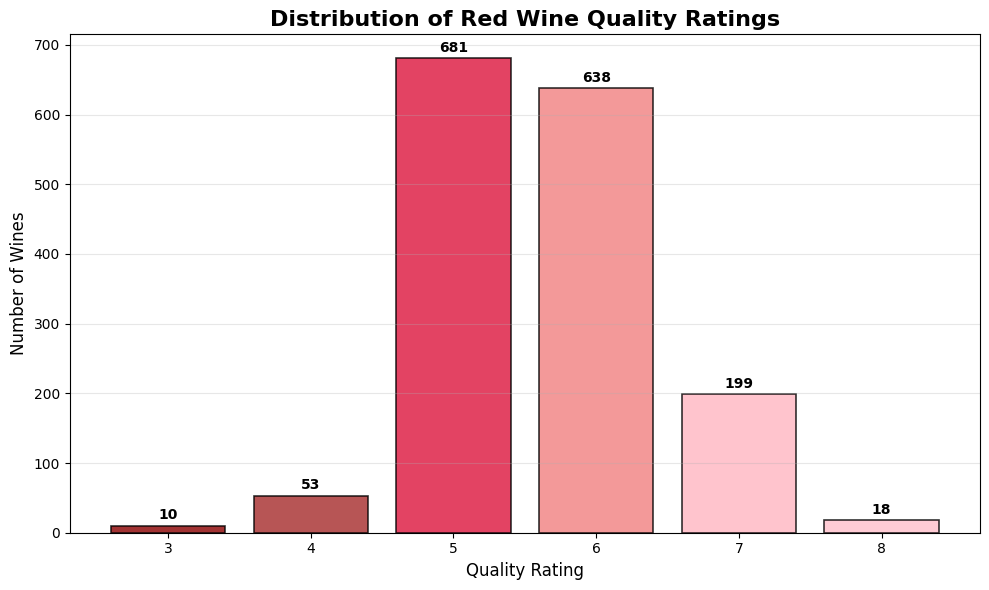

In [12]:
# Create a stylish bar plot for quality distribution
plt.figure(figsize=(10, 6))
colors = ['#8B0000', '#A52A2A', '#DC143C', '#F08080', '#FFB6C1', '#FFC0CB']
quality_counts = df['quality'].value_counts().sort_index()

plt.bar(quality_counts.index, quality_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)
plt.title('Distribution of Red Wine Quality Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Quality Rating', fontsize=12)
plt.ylabel('Number of Wines', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(quality_counts.values):
    plt.text(quality_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**Insight**: Most wines receive average ratings (5-6), with quality 5 and 6 being most common, showing normal distribution pattern in wine evaluation.

### How does alcohol content relate to wine quality?

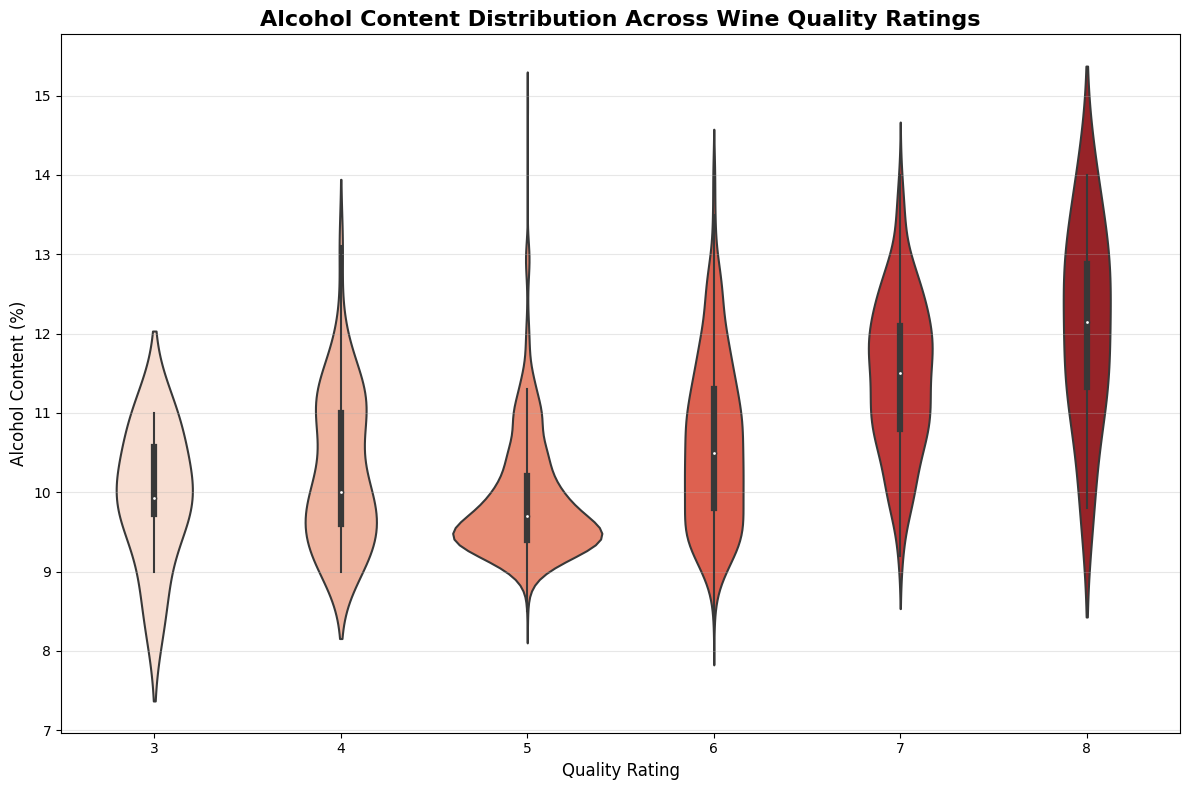

In [13]:
# Create a violin plot for alcohol vs quality
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='quality', y='alcohol', palette='Reds', inner='box')
plt.title('Alcohol Content Distribution Across Wine Quality Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Quality Rating', fontsize=12)
plt.ylabel('Alcohol Content (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


**Insight**: Higher quality wines generally contain more alcohol, with quality 8 wines showing highest alcohol content and wider distribution range.

### What are the correlations between all chemical properties?

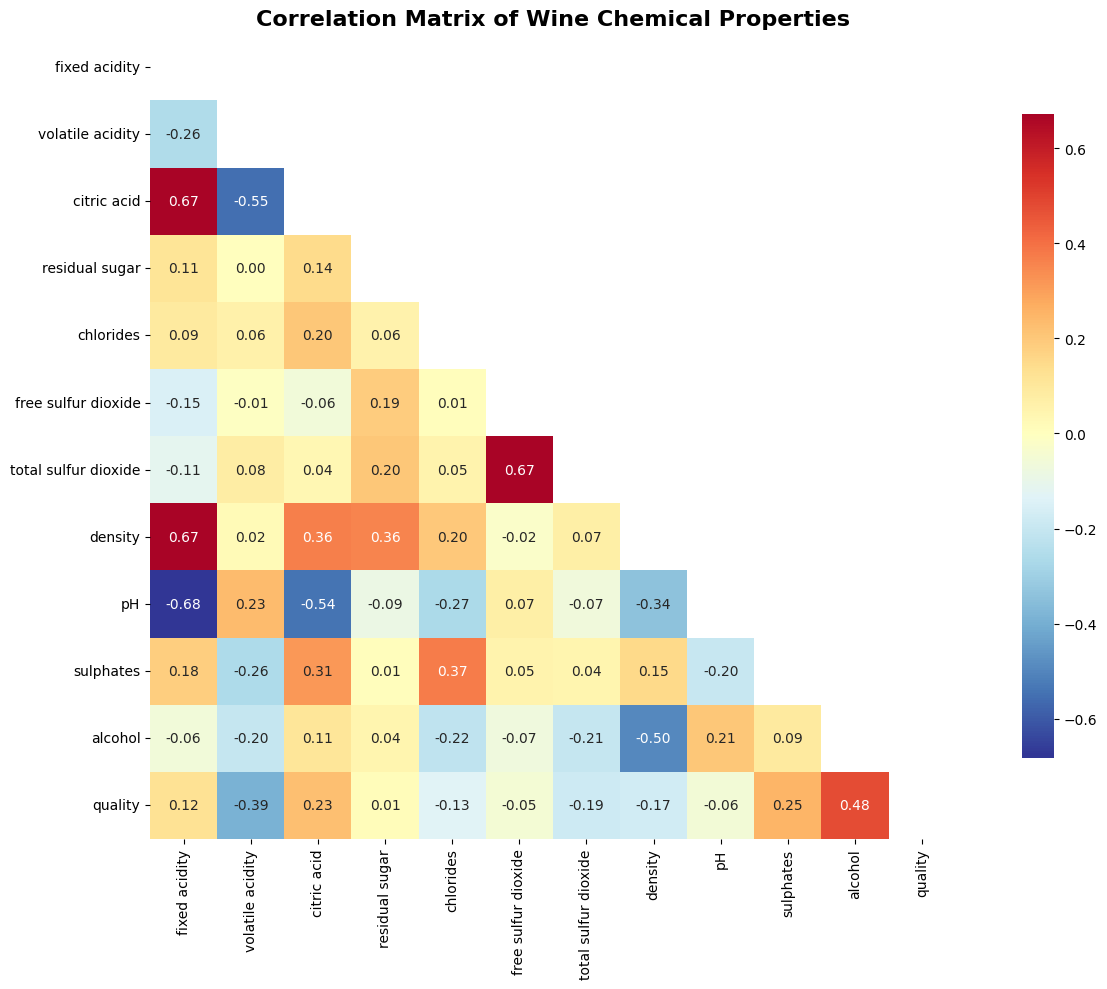

In [14]:
# Create a comprehensive correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Wine Chemical Properties', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


**Insight**: Strong correlations exist between density-alcohol (-0.50), fixed acidity-pH (-0.68), and citric acid-fixed acidity (0.67), revealing chemical relationships.

### What's the relationship between density and alcohol content?

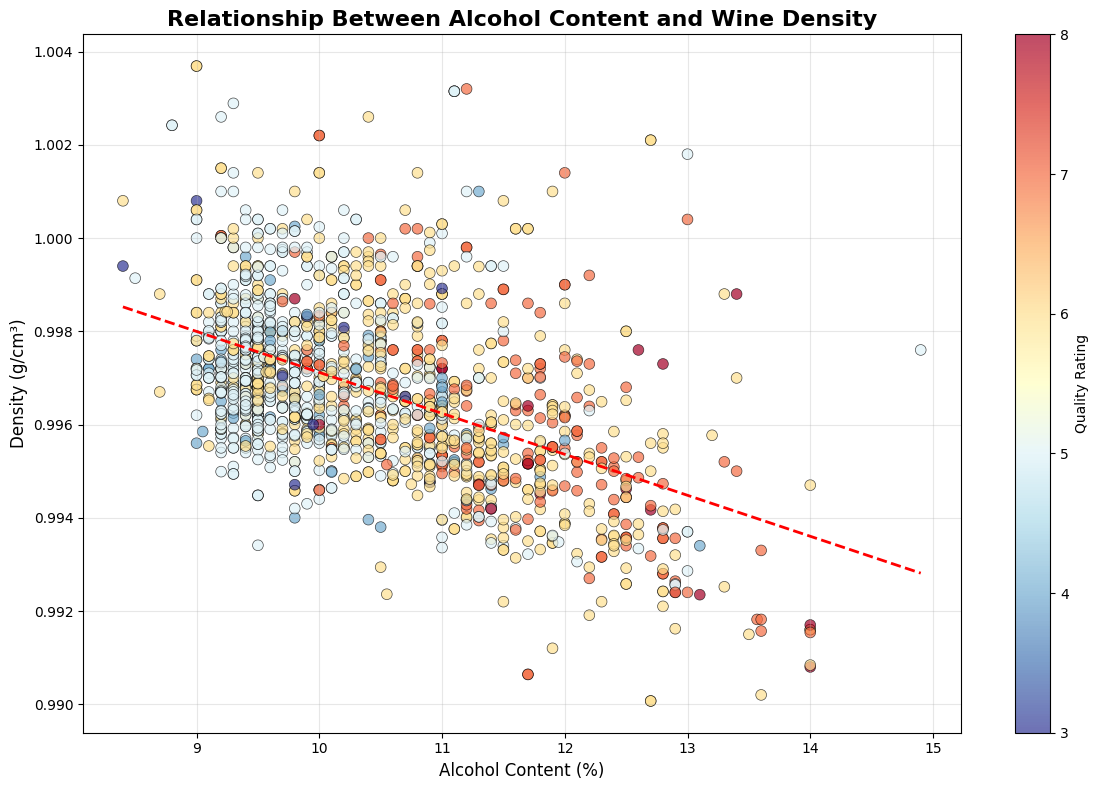

In [16]:
# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
plt.scatter(df['alcohol'], df['density'], c=df['quality'], cmap='RdYlBu_r', 
           alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

# Add regression line
z = np.polyfit(df['alcohol'], df['density'], 1)
p = np.poly1d(z)
plt.plot(df['alcohol'].sort_values(), p(df['alcohol'].sort_values()), "red", linewidth=2, linestyle='--')

plt.colorbar(label='Quality Rating')
plt.title('Relationship Between Alcohol Content and Wine Density', fontsize=16, fontweight='bold')
plt.xlabel('Alcohol Content (%)', fontsize=12)
plt.ylabel('Density (g/cm³)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Insight**: Strong negative correlation between alcohol and density; higher alcohol wines have lower density, with better quality wines clustering together.

### How do pH levels distribute across different quality wines?

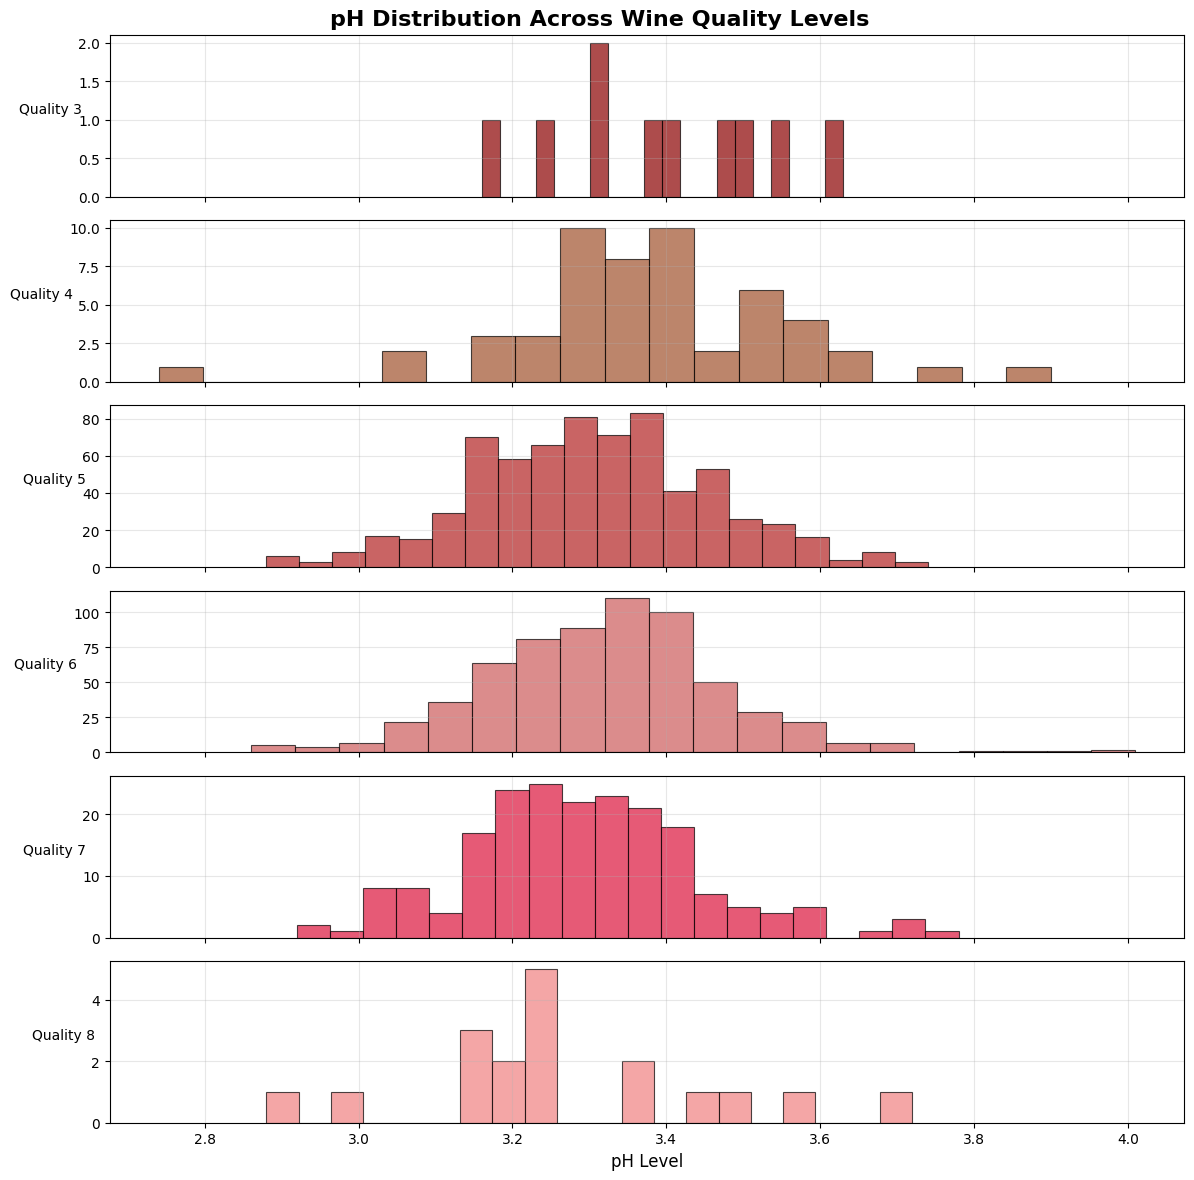

In [17]:
# Create a ridge plot effect using multiple histograms
fig, axes = plt.subplots(len(df['quality'].unique()), 1, figsize=(12, 12), sharex=True)
colors = ['#8B0000', '#A0522D', '#B22222', '#CD5C5C', '#DC143C', '#F08080']

for i, quality in enumerate(sorted(df['quality'].unique())):
    data = df[df['quality'] == quality]['pH']
    axes[i].hist(data, bins=20, alpha=0.7, color=colors[i], edgecolor='black', linewidth=0.8)
    axes[i].set_ylabel(f'Quality {quality}', rotation=0, labelpad=20)
    axes[i].grid(alpha=0.3)

plt.suptitle('pH Distribution Across Wine Quality Levels', fontsize=16, fontweight='bold', y=0.98)
plt.xlabel('pH Level', fontsize=12)
plt.tight_layout()
plt.show()


**Insight**: pH levels remain relatively consistent across quality ratings, suggesting pH alone doesn't strongly influence wine quality perception.

### What's the multivariate relationship between key quality predictors?

<Figure size 1400x1000 with 0 Axes>

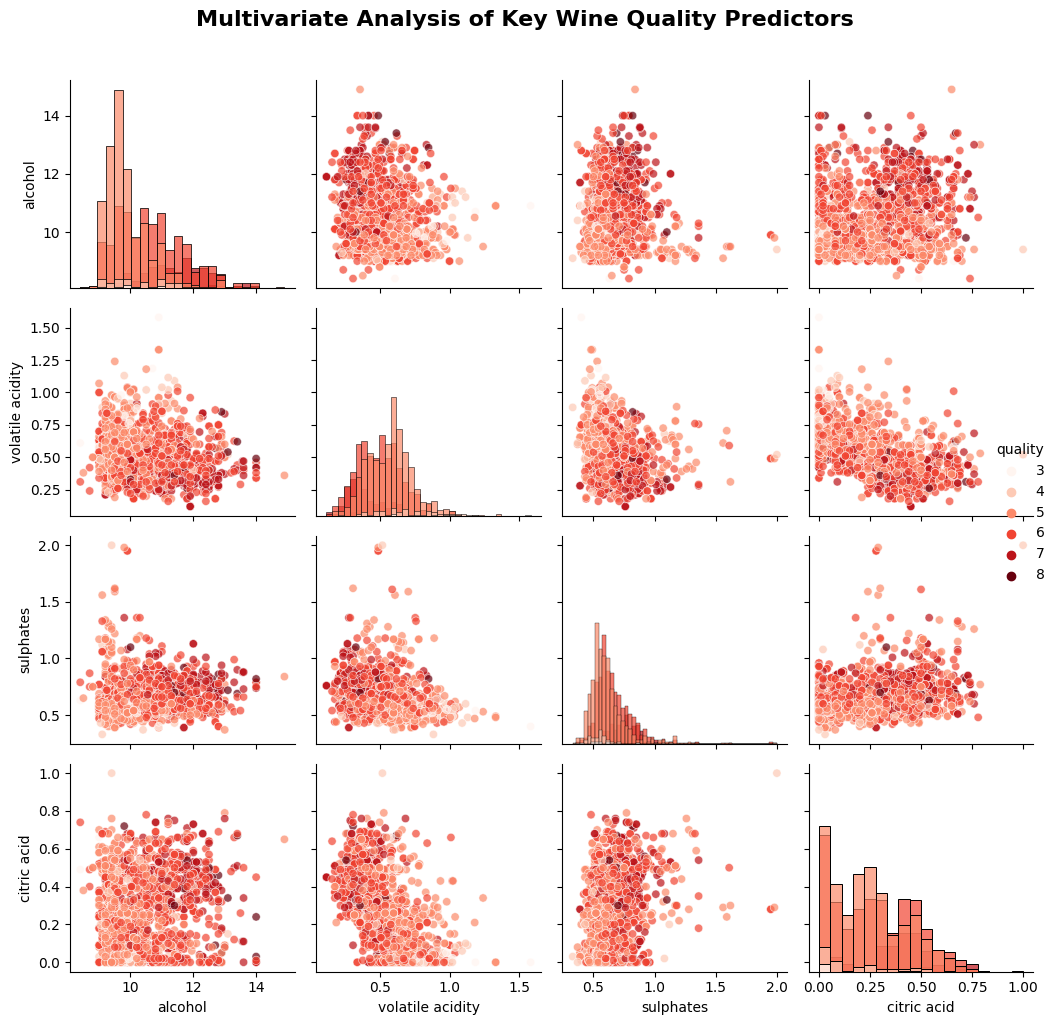

In [18]:
# Create a pair plot for key variables
key_vars = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
plt.figure(figsize=(14, 10))
sns.pairplot(df[key_vars], hue='quality', palette='Reds', diag_kind='hist', 
            plot_kws={'alpha': 0.7}, diag_kws={'alpha': 0.7})
plt.suptitle('Multivariate Analysis of Key Wine Quality Predictors', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


**Insight**: Multiple variables interact to determine quality; alcohol, sulphates show positive correlation while volatile acidity shows negative correlation with quality.

### How does citric acid content vary with wine quality?

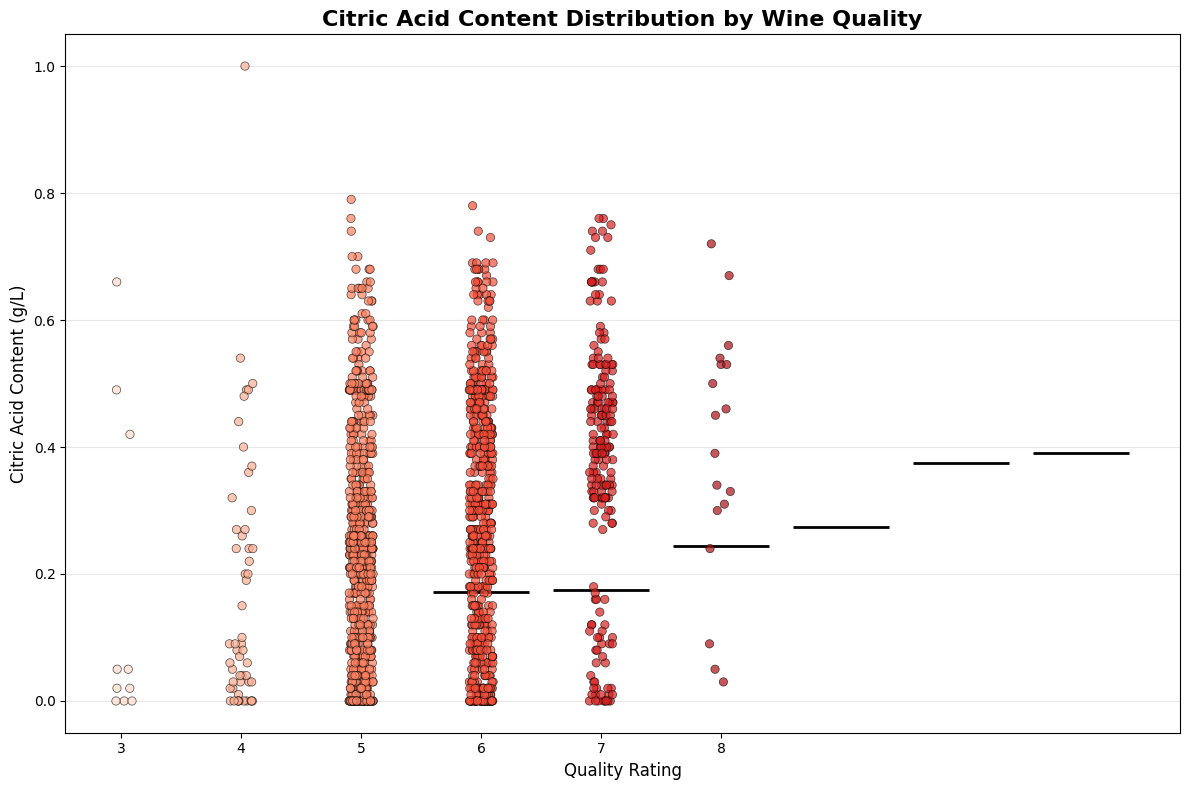

In [19]:
# Create a strip plot with jitter
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='quality', y='citric acid', size=6, alpha=0.7, 
             palette='Reds', jitter=True, linewidth=0.5, edgecolor='black')

# Add mean line for each quality
for quality in df['quality'].unique():
    mean_val = df[df['quality'] == quality]['citric acid'].mean()
    plt.hlines(mean_val, quality-0.4, quality+0.4, colors='black', linewidth=2)

plt.title('Citric Acid Content Distribution by Wine Quality', fontsize=16, fontweight='bold')
plt.xlabel('Quality Rating', fontsize=12)
plt.ylabel('Citric Acid Content (g/L)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


**Insight**: Higher quality wines tend to have more citric acid, which adds freshness and prevents spoilage in better wines.

### What's the distribution of sulfur dioxide levels across quality categories?

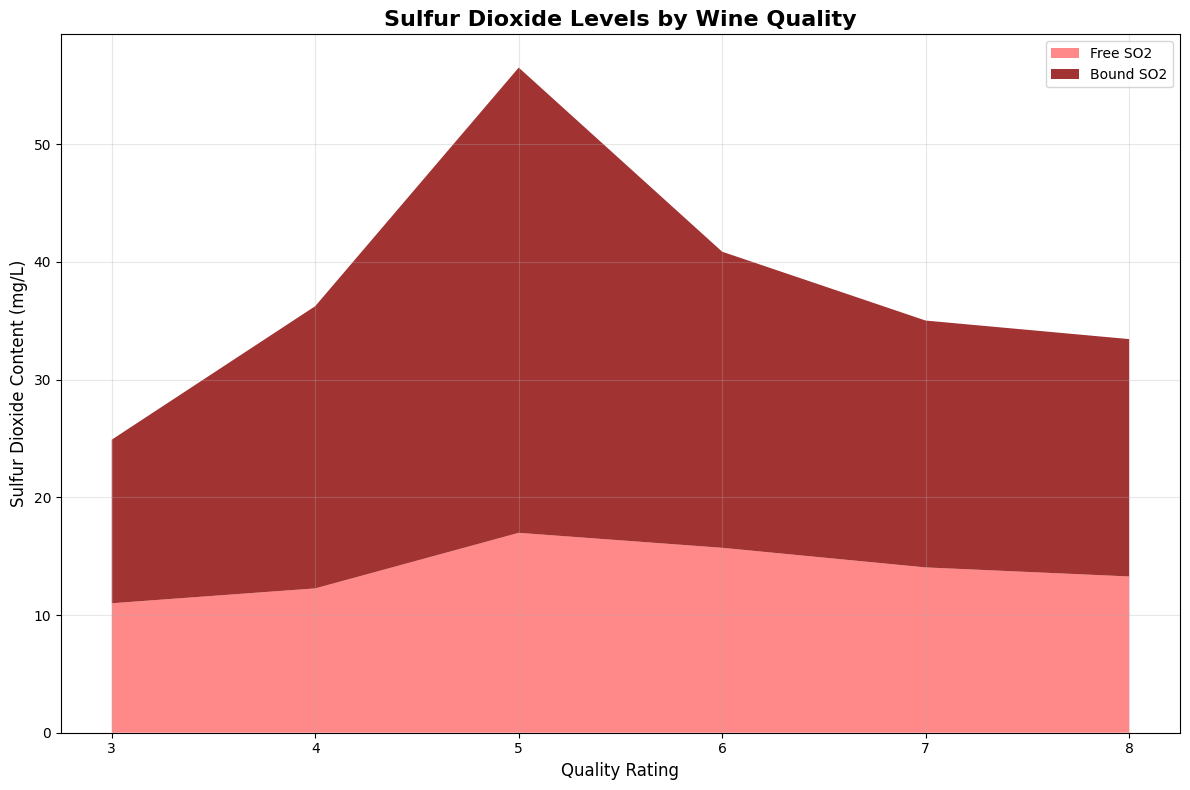

In [20]:
# Create a stacked area chart
quality_groups = df.groupby('quality')[['free sulfur dioxide', 'total sulfur dioxide']].mean()

plt.figure(figsize=(12, 8))
plt.stackplot(quality_groups.index, 
             quality_groups['free sulfur dioxide'], 
             quality_groups['total sulfur dioxide'] - quality_groups['free sulfur dioxide'],
             labels=['Free SO2', 'Bound SO2'], 
             colors=['#FF6B6B', '#8B0000'], alpha=0.8)

plt.title('Sulfur Dioxide Levels by Wine Quality', fontsize=16, fontweight='bold')
plt.xlabel('Quality Rating', fontsize=12)
plt.ylabel('Sulfur Dioxide Content (mg/L)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Insight**: Moderate sulfur dioxide levels appear optimal for quality; excessive amounts may negatively impact wine taste and aroma characteristics.

### How do multiple chemical properties cluster wines into quality groups?

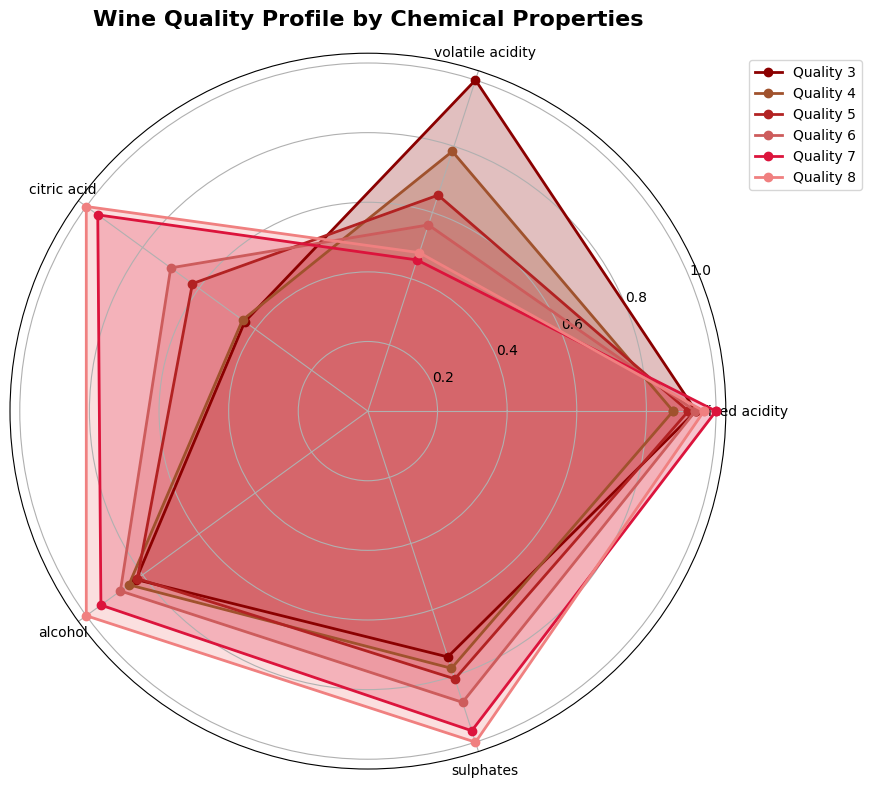

In [21]:
# Create a radar chart for average properties by quality
from math import pi

# Calculate means by quality
quality_means = df.groupby('quality').mean()
properties = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'sulphates']

# Normalize data for radar chart
quality_means_norm = quality_means[properties].div(quality_means[properties].max())

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(projection='polar'))
colors = ['#8B0000', '#A0522D', '#B22222', '#CD5C5C', '#DC143C', '#F08080']

angles = [n / float(len(properties)) * 2 * pi for n in range(len(properties))]
angles += angles[:1]

for i, quality in enumerate(quality_means_norm.index):
    values = quality_means_norm.loc[quality].values.tolist()
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Quality {quality}', color=colors[i])
    ax.fill(angles, values, alpha=0.25, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(properties)
ax.set_title('Wine Quality Profile by Chemical Properties', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.tight_layout()
plt.show()


**Insight**: Quality profiles show distinct patterns; higher quality wines have more alcohol, citric acid, sulphates but lower volatile acidity levels.

### How do residual sugar and chlorides jointly affect wine quality?

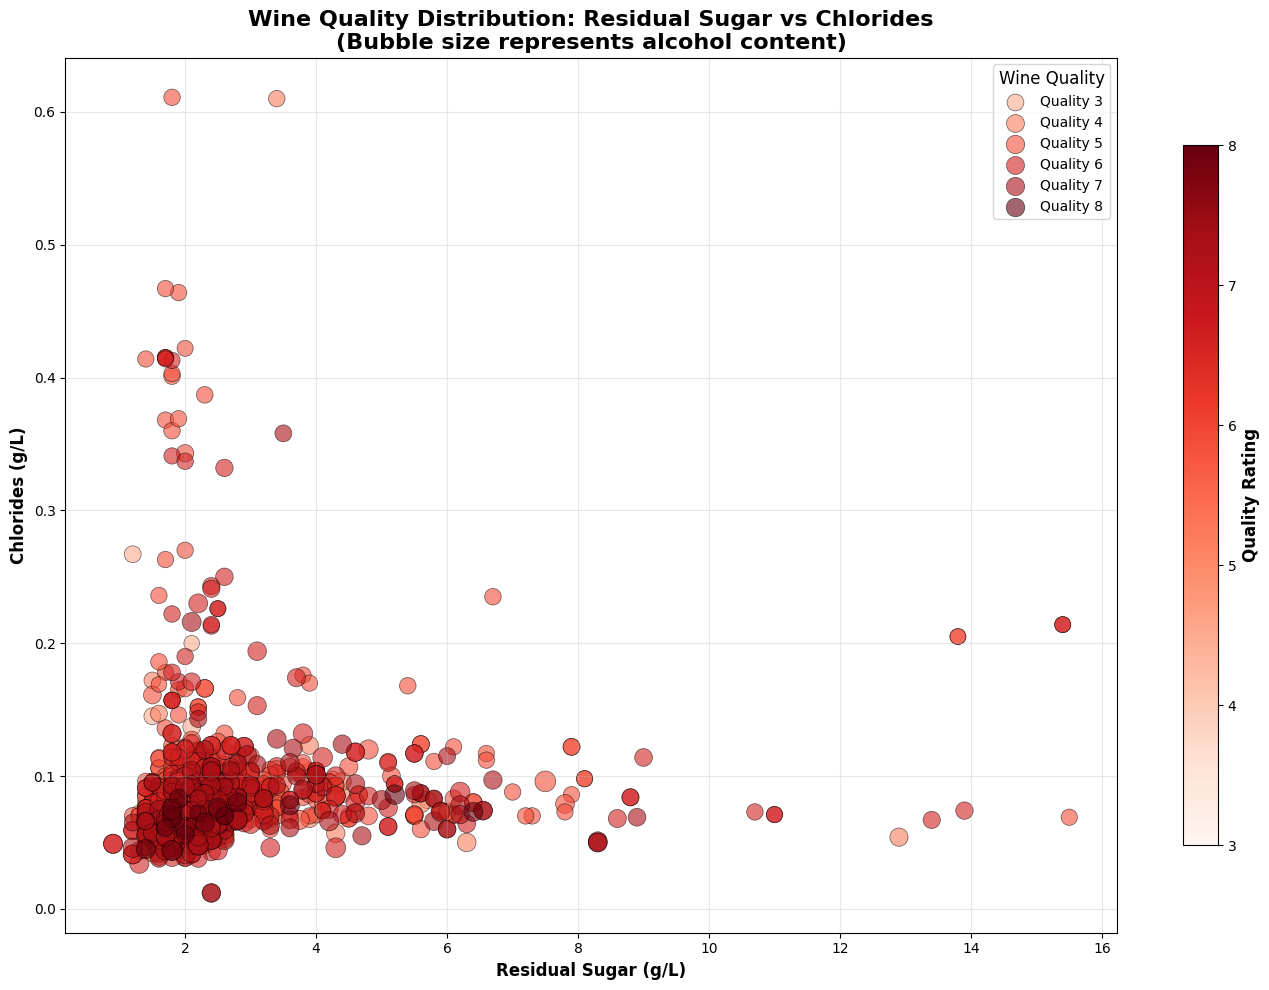

In [22]:
# Create a bubble chart showing the relationship between residual sugar, chlorides, and quality
plt.figure(figsize=(14, 10))

# Create quality categories for color mapping
quality_categories = df['quality'].unique()
colors = plt.cm.Reds(np.linspace(0.3, 1, len(quality_categories)))

for i, quality in enumerate(sorted(quality_categories)):
    quality_data = df[df['quality'] == quality]
    plt.scatter(quality_data['residual sugar'], 
               quality_data['chlorides'],
               s=quality_data['alcohol'] * 15,  # Bubble size based on alcohol content
               c=[colors[i]], 
               alpha=0.6, 
               edgecolors='black', 
               linewidth=0.5,
               label=f'Quality {quality}')

plt.xlabel('Residual Sugar (g/L)', fontsize=12, fontweight='bold')
plt.ylabel('Chlorides (g/L)', fontsize=12, fontweight='bold')
plt.title('Wine Quality Distribution: Residual Sugar vs Chlorides\n(Bubble size represents alcohol content)', 
          fontsize=16, fontweight='bold')

# Add legend
plt.legend(title='Wine Quality', title_fontsize=12, fontsize=10, loc='upper right')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbar to show quality scale
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(quality_categories), vmax=max(quality_categories)))
sm.set_array([])
cbar = plt.colorbar(sm, shrink=0.8)
cbar.set_label('Quality Rating', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**Insight**: Lower chloride and moderate residual sugar levels characterize higher quality wines; larger bubbles indicate higher alcohol content generally correlates with better ratings.

# Outlier Analysis and Handling

### Outlier Handling

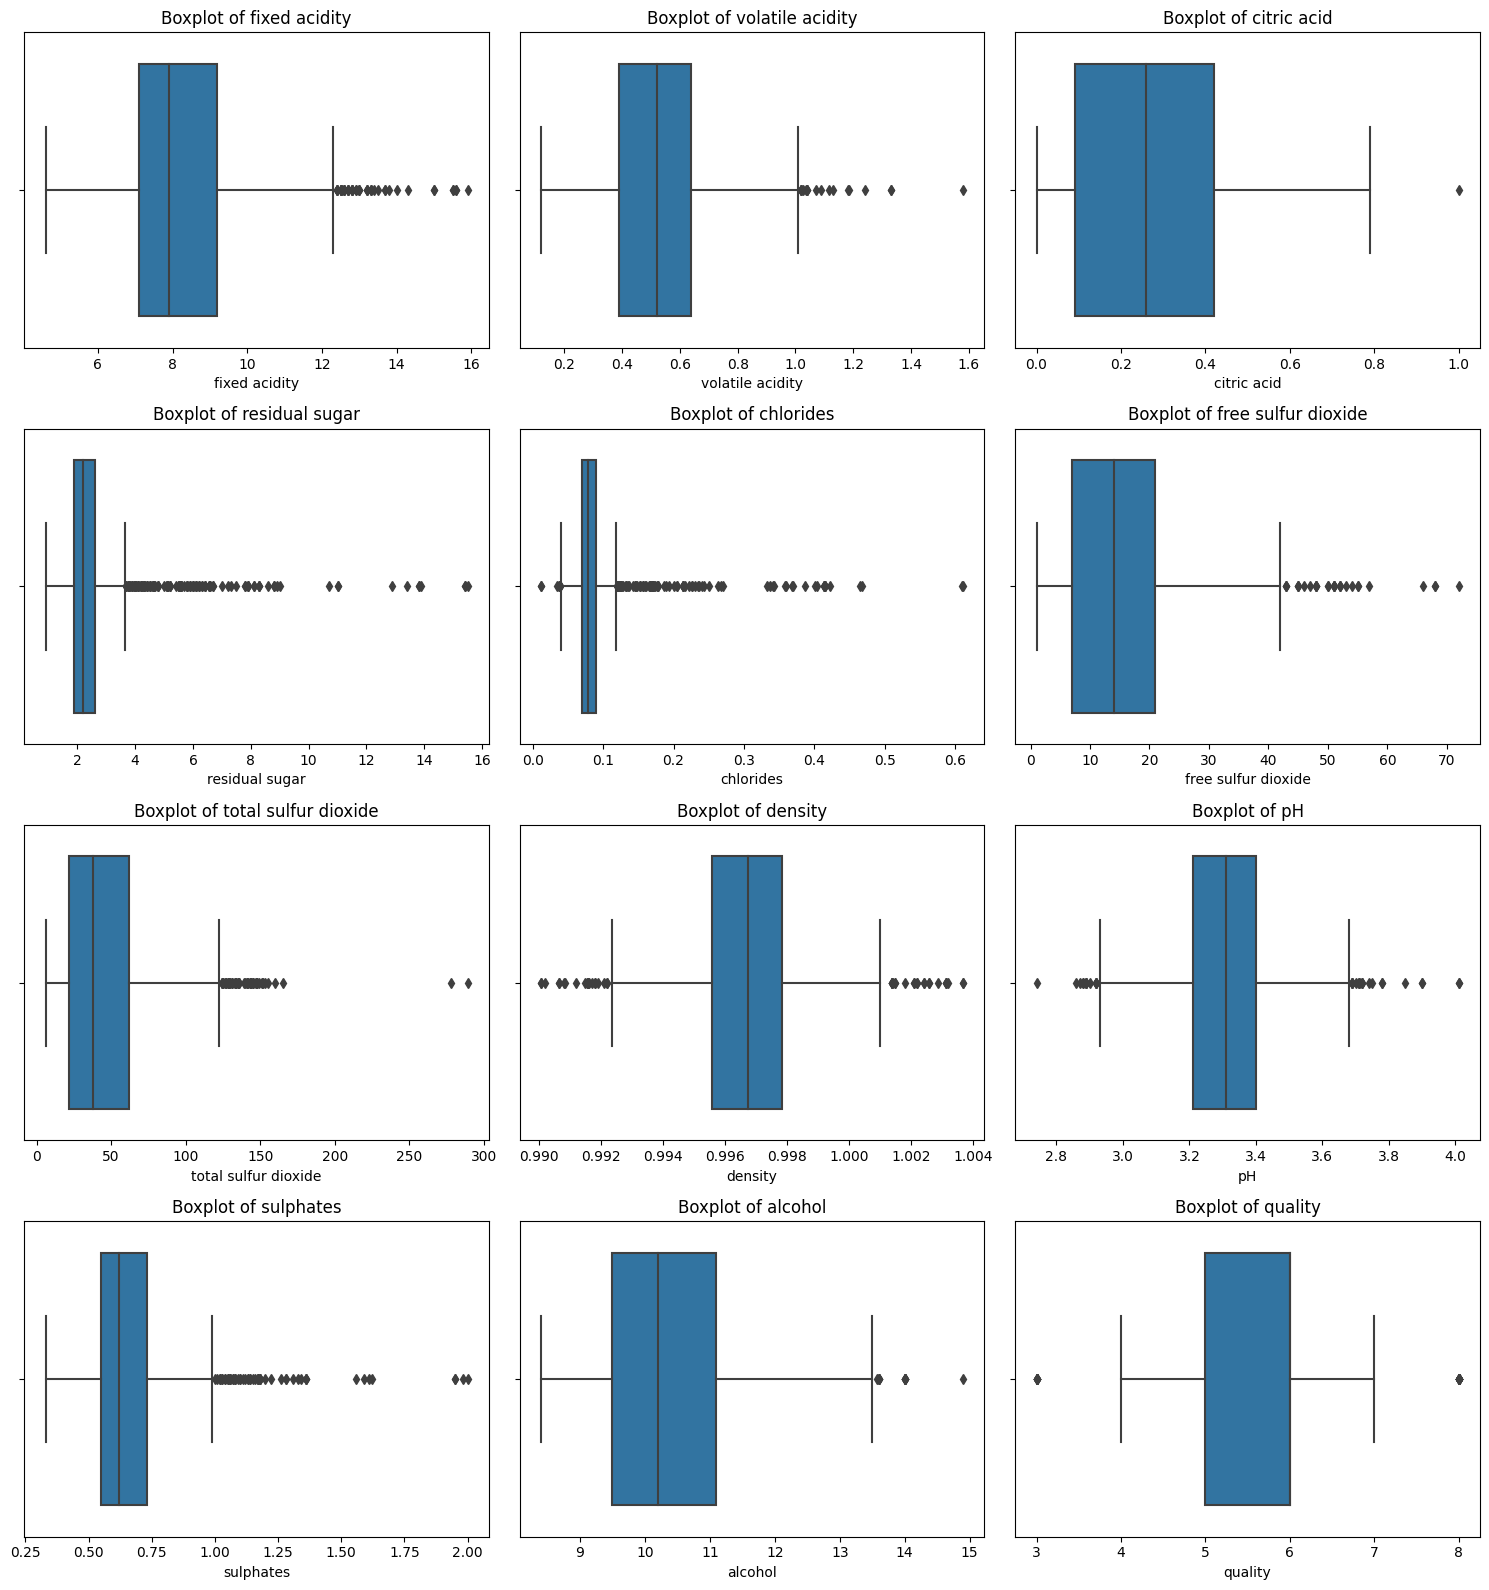

In [23]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Outlier Handling

In [24]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head()) 

Outliers handled with Winsorization using IQR:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5

### Caping the Outlier

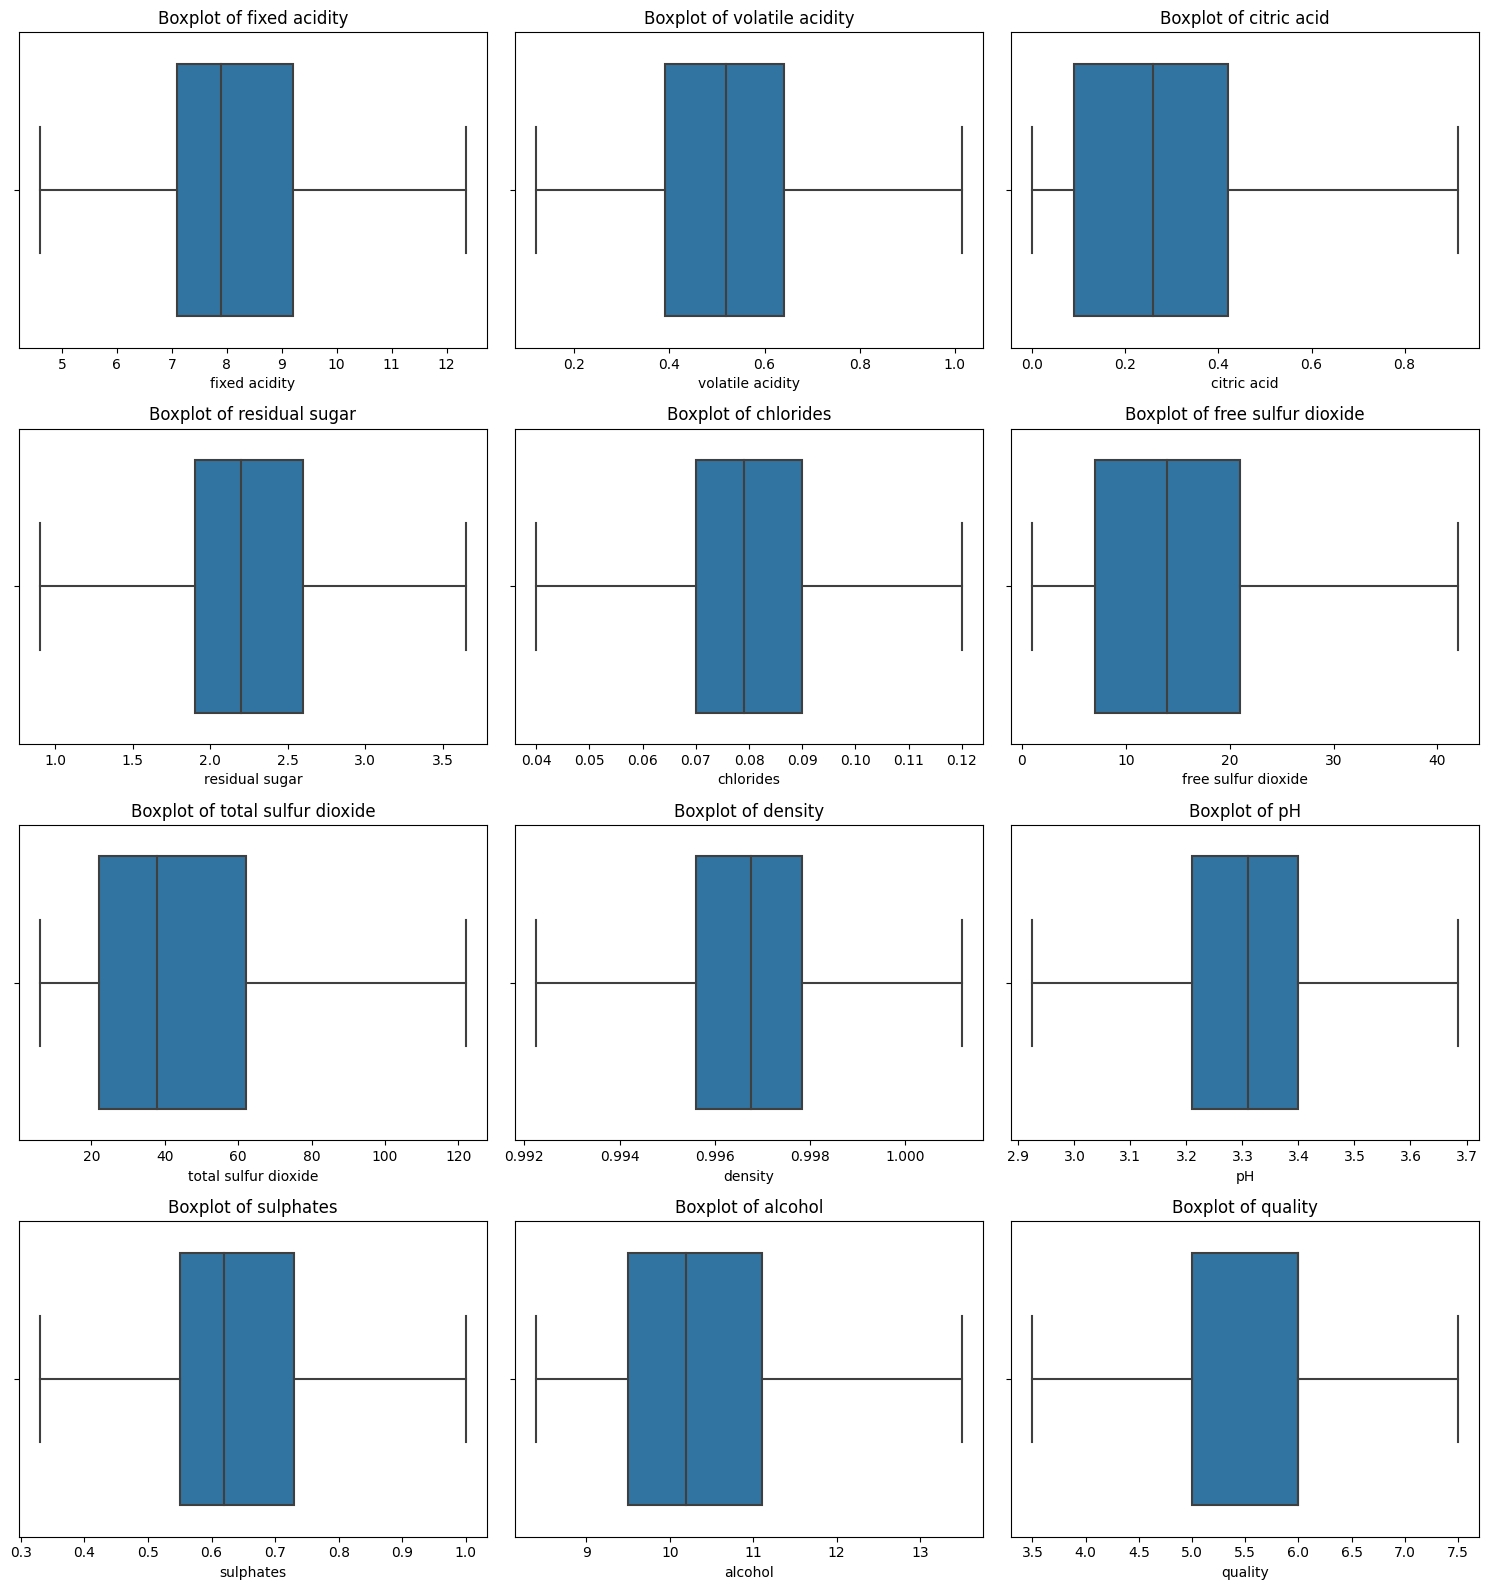

In [25]:
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 📌 Conclusion

## 1. Key Findings
- **Quality Distribution:** The majority of red wines cluster around quality scores **5 – 6**, confirming the dataset’s slight class imbalance toward average wines.  
- **Alcohol’s Positive Influence:** Higher‐quality wines consistently exhibit **greater alcohol content**. Alcohol shows the strongest positive correlation with quality and a pronounced inverse relationship with density.  
- **Volatile Acidity’s Negative Role:** Wines rated **7 – 8** present **lower volatile-acidity** levels; excessive VA produces vinegar notes that diminish sensory appeal.  
- **Citric Acid & Freshness:** Quality climbs with citric-acid concentration, indicating that a fresh, well-rounded palate contributes to higher sensory ratings.  
- **Sulphates & Stability:** Moderate sulphate levels correlate with better scores, likely reflecting optimal SO₂ management that preserves aroma without imparting harshness.  
- **pH & Residual Sugar:** Both features display only mild variations across quality bands, suggesting they are **secondary drivers** relative to alcohol, VA, and citric acid.  
- **SO₂ Balance:** Free and bound SO₂ levels must be balanced; excessive totals appear in lower-quality groups, hinting at over-sulphiting to mask flaws.

## 2. Multivariate Insights
- **Quality “Fingerprints”:** Radar profiles reveal that top-tier wines share a common signature—**high alcohol & citric acid, low volatile acidity**, and balanced sulphates—highlighting the multifactor nature of perceived quality.  
- **Sugar-Chloride Interaction:** A bubble plot of residual sugar vs chlorides shows higher quality when **chlorides are low** and sugar is moderate, with bubble size (alcohol) reinforcing alcohol’s importance.

## 3. Practical Implications for Winemakers
1. **Fermentation Control:** Target alcohol levels of **11 % – 13 %** while preventing over-dilution to avoid increased density.  
2. **Acetic Acid Management:** Employ strict hygiene and controlled fermentation temperatures to keep **volatile acidity below ~0.4 g/L**.  
3. **Balanced SO₂ Regimen:** Monitor free/total SO₂, maintaining protection without sensory penalty.  
4. **Acid Adjustment:** Consider citric-acid additions or malolactic-fermentation strategies to optimize mouthfeel and freshness.

## 4. Limitations
- Dataset reflects a **single geographic origin** and vintage range; broader sampling would improve generalizability.  
- Quality scores are **sensory panel averages**—subject to human variability and cultural tastes.  
- No information on **aging conditions** or grape variety, both of which influence chemistry and quality.

## 5. Future Work
- **Predictive Modeling:** Build and validate machine-learning models (e.g., Random Forest, XGBoost) to predict quality and rank feature importances.  
- **Sensory-Chemical Mapping:** Integrate detailed tasting notes to link chemical drivers with specific flavor descriptors.  
- **Cross-Validation with White Wines:** Apply methodology to white-wine data to confirm whether key drivers differ by style.  
- **Explainable AI:** Use SHAP or partial-dependence plots to provide interpretable guidelines for fermentation and blending decisions.

---

By combining univariate, bivariate, and multivariate visual analyses, this project clarifies how discrete chemical parameters collectively define perceived red-wine quality and provides actionable insight for continuous process improvement in enology.
